In [1]:
input_dim = 5
model_file = "Model/model.cpkt"
num_clusters = 2

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pickle
import tensorflow as tf

import sys
sys.path.insert(0, "../Code/")
from base import load_encoder
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x = pickle.load(open("data.pkl", "rb"))

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


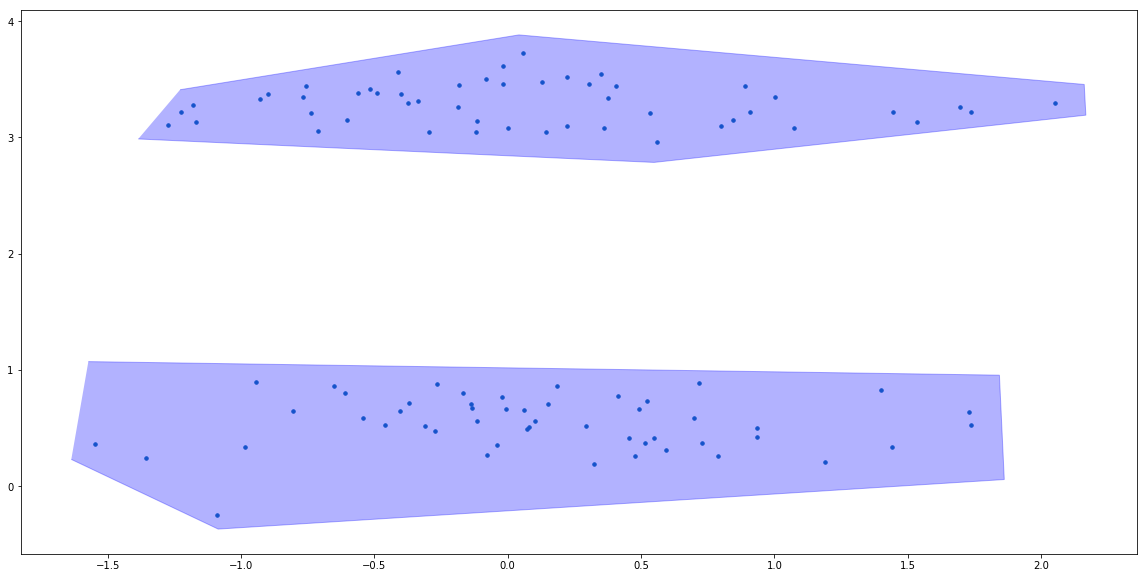

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

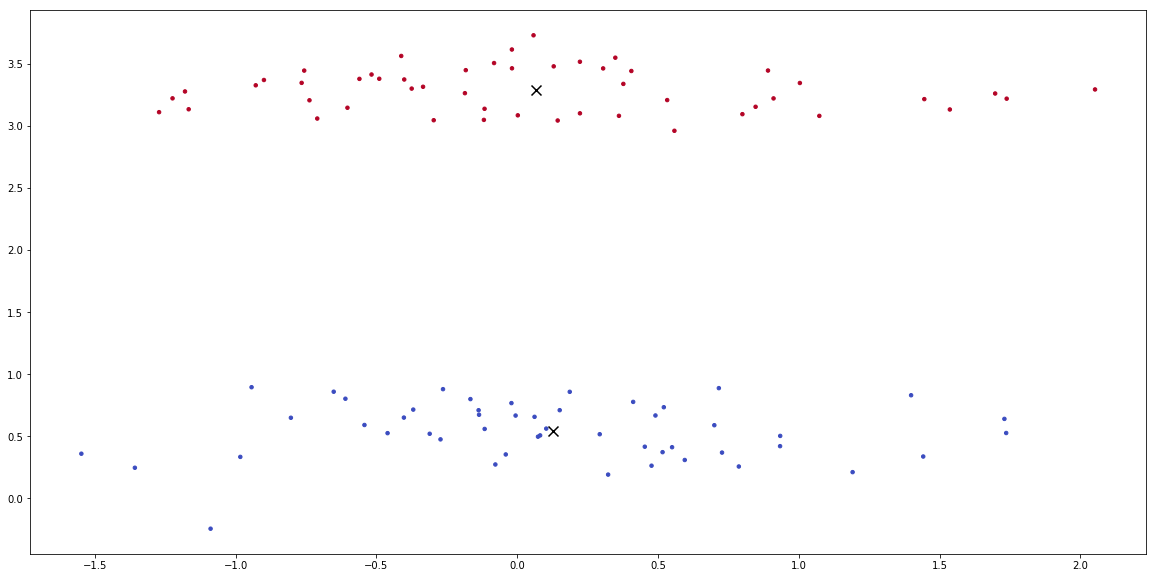

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [5]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas = explain(load_model, x, data_rep, indices, lambda_global = 0.5)    


INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 3.0550816
1 2.904741358757019
2 2.8269519495964053
3 2.7642368514537816
4 2.682893017458916
7 2.581266225532603
10 2.5205823220637043
11 2.415802088781589
12 2.346238214437122
13 2.251474784610231
16 2.234227619563958
17 2.1761811870295595
28 2.122900575744973
29 2.0601337167750593
30 2.0461945724306223
145 2.009530464270867
146 1.954762291424713
147 1.909140030902542
302 1.8894373694041706
544 1.8706250210659228
545 1.860134984855937
546 1.8376184694216433
547 1.802460288308184
1175 1.7862640096391904
1246 1.758914169911467
1498 1.7532439147974435



From  0  to  1 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


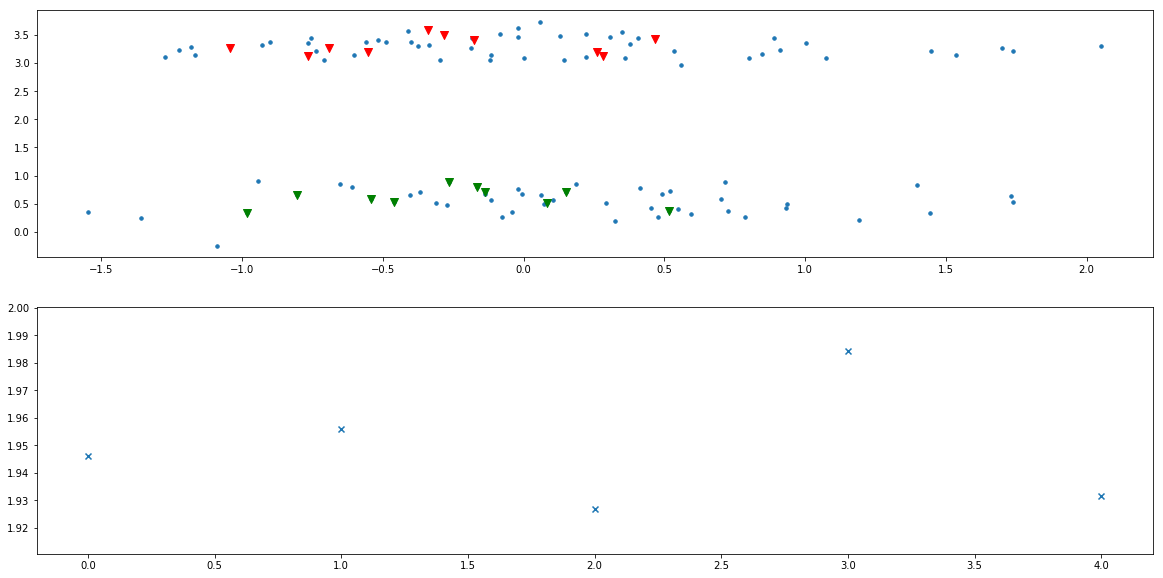


From  1  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


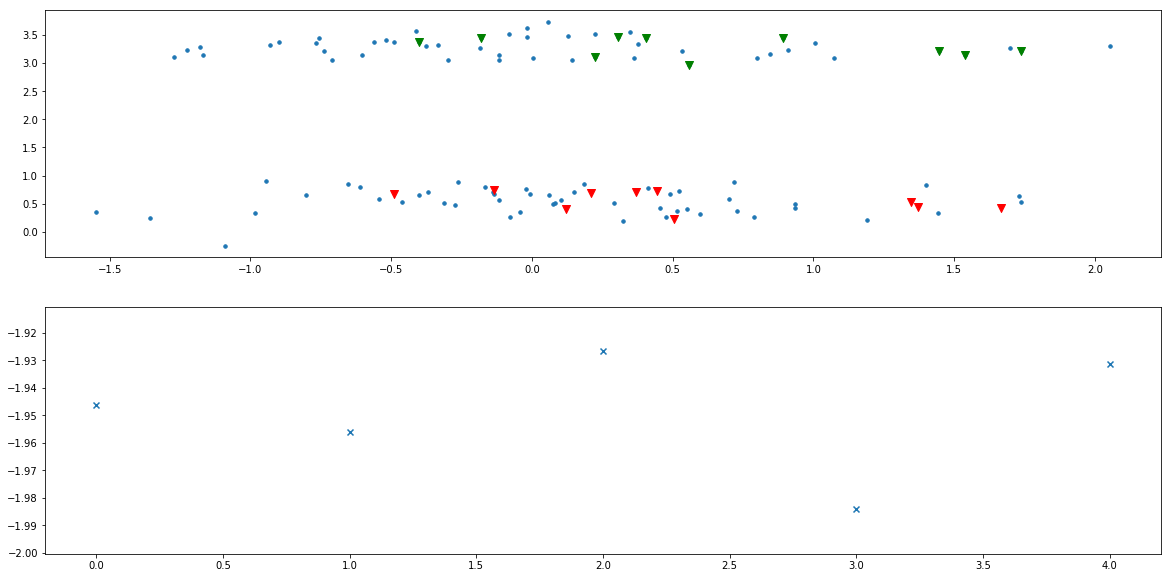

In [6]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
